#  Imports

In [1]:
import pandas as pd 
# Pandas is a powerful library for data manipulation and analysis (reading, writing, cleaning, preprocessing, data analysis (grouping, merging, and reshaping data))
import numpy as np
# NumPy is a fundamental package for scientific computing in Python. NumPy is often used for numerical computations and data analysis)
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sb
# Seaborn is a statistical data visualization library based on Matplotlib. It simplifies the creation of complex visualizations (heatmaps, violin plots, pair plots)
import seaborn as sns

#  Lecture du Dataset

In [2]:
df = pd.read_csv('flow.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_788\3613370282.py:1: DtypeWarning: Columns (3,5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow.csv')


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.712412e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,1,0.166667,4.255319e-09,342,57.0,0.000001,120,60,0,NaN
1,1.712412e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,1.0,NaN,...,0,0.000000,0.000000e+00,0,0.0,0.000000,120,60,0,NaN
2,1.712412e+09,1,192.168.217.133,NaN,192.168.217.254,NaN,0,NaN,1.0,NaN,...,0,0.000000,0.000000e+00,0,0.0,0.000000,120,60,0,NaN
3,1.712412e+09,1,192.168.217.133,00:00:00:00:00:02,192.168.217.2,00:50:56:f9:c0:e5,1,2.0,NaN,NaN,...,0,0.000000,0.000000e+00,0,0.0,0.000000,140,60,0,NaN
4,1.712412e+09,1,192.168.217.254,00:50:56:e3:5e:88,192.168.217.133,00:00:00:00:00:02,1,2.0,NaN,NaN,...,0,0.000000,0.000000e+00,0,0.0,0.000000,140,60,0,NaN


#  Représentation de la répartition des classes

[nan 'udp flood' 'icmp flood' 'SYN flood' 'http flood' 'slowloris']


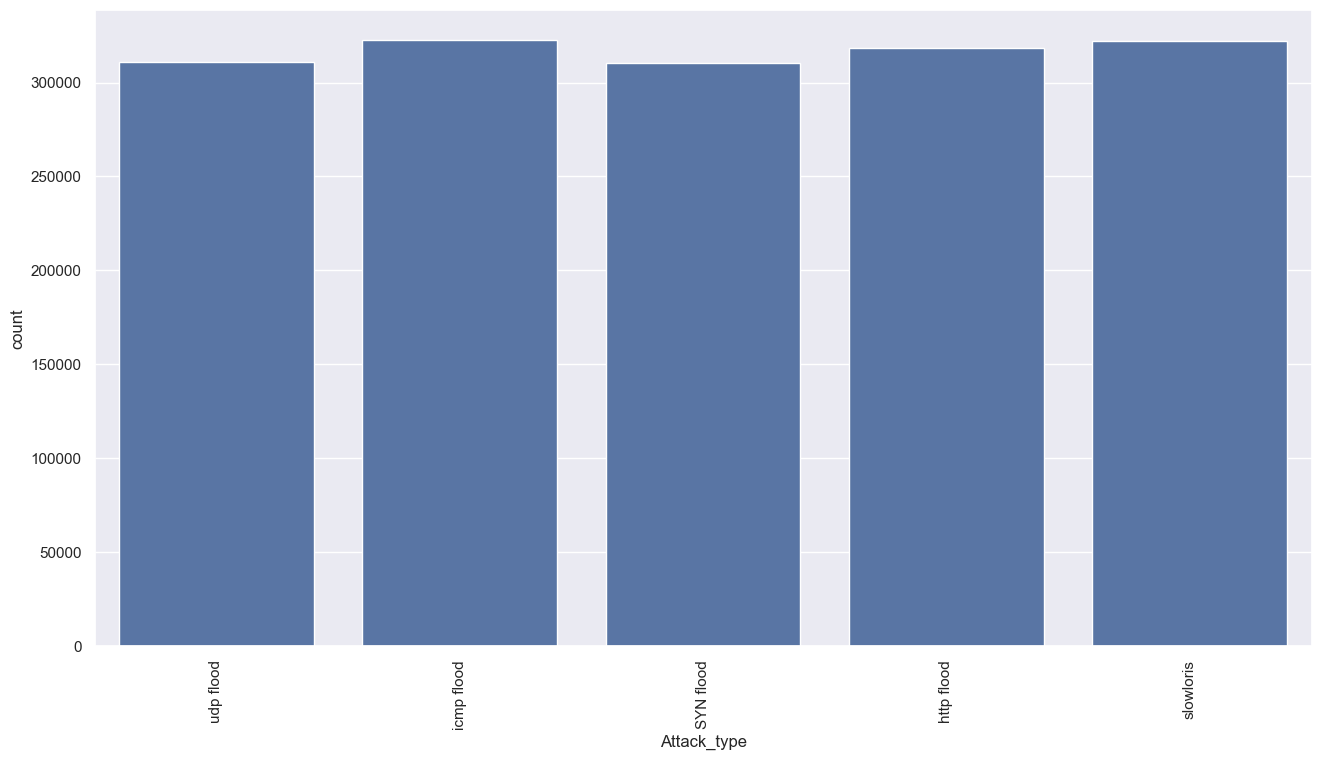

In [3]:
print(df['Attack_type'].unique())
sns.set(rc={'figure.figsize':(15.7,8.27)})
#Plot Bar chart to understand event total of device
p=sns.countplot(x='Attack_type', data=df)
_ = plt.setp(p.get_xticklabels(), rotation=90)

# Missing value analysis

In [4]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH', 'Hard_timeout', 'Idle_timeout'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
0,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,6,235000000,1,0.166667,4.255319e-09,342,57.000000,1.455319e-06,0,NaN
1,0,NaN,NaN,1.0,0.0,8.0,0.0,NaN,NaN,NaN,...,5,231000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
2,0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,5,214000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
3,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,238000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
4,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,218000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1,slowloris
1864559,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1,slowloris
1864560,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1,slowloris
1864561,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1,slowloris


In [5]:
number_null_value=df.isnull().sum()
number_null_value

Arp                     0
Arp_code          1852689
Port_dst           338242
Icmp                11874
Icmp_code         1538195
Icmp_type         1538195
Tcp                 11874
ACK                649666
PSH                649666
RST                649666
SYN                649666
FIN                649666
Http                11874
Ftp                 11874
Udp                 11874
Dns                 11874
Dhcp                11874
Flow_duration           0
Flow_dur_nsec           0
Packet_count            0
Pkt_per_sec             0
Pkt_per_nsec            0
Bytes                   0
Bytes_per_sec           0
Bytes_per_nsec          0
Attack                  0
Attack_type        280272
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864563 entries, 0 to 1864562
Data columns (total 27 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Arp             int64  
 1   Arp_code        float64
 2   Port_dst        float64
 3   Icmp            float64
 4   Icmp_code       float64
 5   Icmp_type       float64
 6   Tcp             float64
 7   ACK             float64
 8   PSH             float64
 9   RST             float64
 10  SYN             float64
 11  FIN             float64
 12  Http            float64
 13  Ftp             float64
 14  Udp             float64
 15  Dns             float64
 16  Dhcp            float64
 17  Flow_duration   int64  
 18  Flow_dur_nsec   int64  
 19  Packet_count    int64  
 20  Pkt_per_sec     float64
 21  Pkt_per_nsec    float64
 22  Bytes           int64  
 23  Bytes_per_sec   float64
 24  Bytes_per_nsec  float64
 25  Attack          int64  
 26  Attack_type     object 
dtypes: float64(20), int64(6), object(1)
memor

In [7]:
df.describe()

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
count,1.864563e+06,11874.000000,1.526321e+06,1.852689e+06,326368.000000,326368.000000,1.852689e+06,1.214897e+06,1.214897e+06,1.214897e+06,...,1.852689e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06
mean,6.368248e-03,1.570574,1.596913e+04,1.761591e-01,0.003916,7.952514,6.557479e-01,5.807035e-01,1.929415e-01,5.637103e-02,...,6.757745e-04,2.483750e+01,4.956385e+08,1.903991e+02,1.426158e+01,1.840200e-06,4.801560e+06,3.572297e+05,5.404087e-02,8.496849e-01
std,7.954682e-02,0.495015,2.302236e+04,3.809556e-01,0.108315,0.598379,4.751239e-01,4.934442e-01,3.946076e-01,2.306369e-01,...,2.598689e-02,1.809135e+01,2.874235e+08,4.102711e+03,6.197134e+02,2.245038e-04,1.478351e+08,2.196727e+07,9.708830e+00,3.573801e-01
min,0.000000e+00,1.000000,2.100000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000,5.300000e+01,0.000000e+00,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,9.000000e+00,2.480000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,2.000000,8.000000e+01,0.000000e+00,0.000000,8.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.200000e+01,4.920000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,2.000000,3.901500e+04,0.000000e+00,0.000000,8.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.000000e+01,7.430000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,2.000000,6.099800e+04,1.000000e+00,3.000000,8.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.160000e+02,9.990000e+08,2.855880e+05,1.170120e+05,1.544450e-01,1.309046e+10,5.247171e+09,6.874668e+03,1.000000e+00


In [8]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()


In [9]:
df_sorted=df.sort_values(by=['Attack_type'])

# Encodage des classes

In [10]:
from sklearn import preprocessing
def label_encoder(colum):
    le = preprocessing.LabelEncoder()
    le.fit(colum)
    print(list(le.classes_))
    return le.transform(colum)

In [11]:
def data_pre(df):
    liste=["Attack_type"]
    for i in liste:
      df[i]=label_encoder(df[i])

In [12]:
data_pre(df)
df

['SYN flood', 'http flood', 'icmp flood', 'slowloris', 'udp flood', nan]


,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
0,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,6,235000000,1,0.166667,4.255319e-09,342,57.000000,1.455319e-06,0,5
1,0,-1.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,5,231000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
2,0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,214000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
3,1,2.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,5,238000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
4,1,2.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,5,218000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1,3
1864559,0,-1.0,60460.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1,3
1864560,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1,3
1864561,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1,3


# Vérification de l'equillibrage des classes

In [13]:
df_attack = df[df['Attack']==1]
df_attack=df_attack.reset_index(drop=True)
df_attack

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
0,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,3,160000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1,4
1,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,13,162000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1,4
2,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,23,163000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1,4
3,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,33,163000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1,4
4,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,43,165000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1,3
1584287,0,-1.0,60460.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1,3
1584288,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1,3
1584289,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1,3


Class=4, n=310649 (19.608%)
Class=2, n=322680 (20.367%)
Class=0, n=310612 (19.606%)
Class=1, n=318507 (20.104%)
Class=3, n=321843 (20.315%)


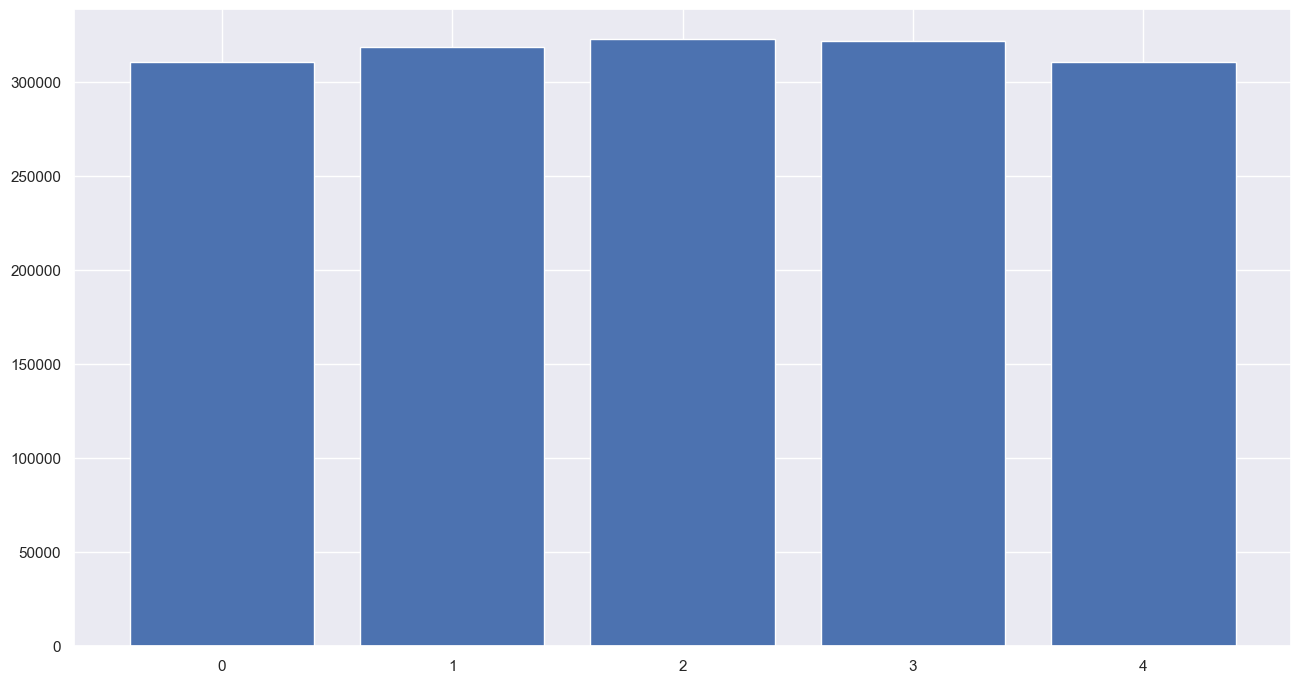

In [14]:
from collections import Counter
from matplotlib import pyplot

# Séparer les caractéristiques (X) et les étiquettes (y)
X = df_attack.drop('Attack_type', axis=1)
y = df_attack['Attack_type']

# Compter les occurrences de chaque classe dans y
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# Tracer un graphique à barres des occurrences de chaque classe
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [15]:
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack,Attack_type
0,0,-1.0,68.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,6,235000000,1,0.166667,4.255319e-09,342,57.000000,1.455319e-06,0,5
1,0,-1.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,5,231000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
2,0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,214000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
3,1,2.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,5,238000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
4,1,2.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,5,218000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1,3
1864559,0,-1.0,60460.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1,3
1864560,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1,3
1864561,0,-1.0,60444.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1,3


# Réequillibrage des classes en utilisant SMOTE

Class=4, n=322680 (20.000%)
Class=2, n=322680 (20.000%)
Class=0, n=322680 (20.000%)
Class=1, n=322680 (20.000%)
Class=3, n=322680 (20.000%)


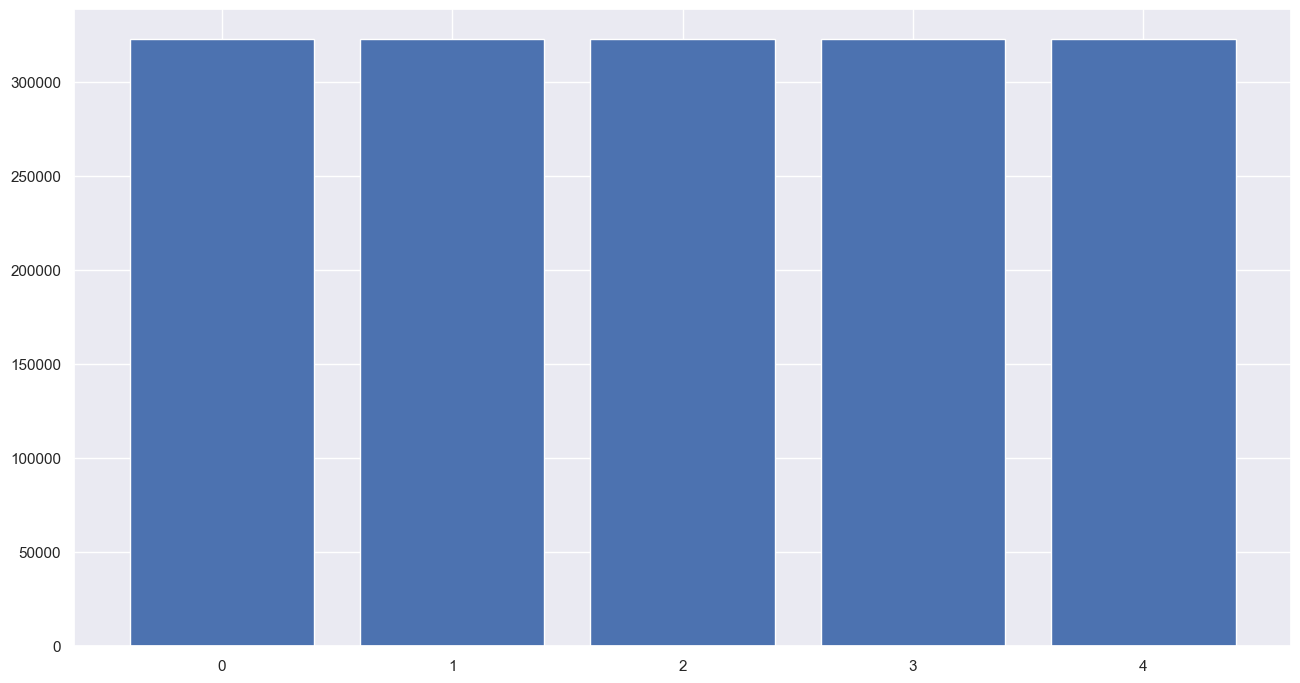

In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Separation du dataset en dataset de training et de test

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train.shape: ', X_train.shape)
print('x_test.shape: ', y_train.shape)
print('x_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (1290720, 26)
x_test.shape:  (1290720,)
x_test.shape:  (322680, 26)
y_test.shape:  (322680,)


In [18]:
X_train

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
635331,0,-1.0,21.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,2,939000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
1121543,0,-1.0,80.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,...,0.0,53,222000000,1,0.018868,4.504505e-09,54,1.018868,2.432432e-07,1
469944,0,-1.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,12,963000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
49148,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,7,230000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
1446571,0,-1.0,58456.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,0.0,51,813000000,3,0.058824,3.690037e-09,222,4.352941,2.730627e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,43,659000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
1414414,0,-1.0,80.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,0.0,3,243000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
131932,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,34,512000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1
671155,0,-1.0,21.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,15,793000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,1


# Normalisation à l'aide de Standard Scaler

In [19]:
scaler = StandardScaler()
num=['Flow_duration', 'Packet_count',	'Pkt_per_sec',	'Bytes'	,'Bytes_per_sec']
scaler.fit(X_train[num])
X[num]=scaler.transform(X[num])
X_train[num] = scaler.transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [20]:
X_train

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
635331,0,-1.0,21.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,-1.220385,939000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
1121543,0,-1.0,80.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,...,0.0,1.607406,222000000,0.033105,-0.001949,4.504505e-09,0.000572,-0.005485,2.432432e-07,1
469944,0,-1.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,-0.665916,963000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
49148,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,-0.943150,230000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
1446571,0,-1.0,58456.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,...,0.0,1.496512,813000000,0.153213,0.002819,3.690037e-09,0.046219,0.002833,2.730627e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,1.052937,659000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
1414414,0,-1.0,80.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,0.0,-1.164938,243000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
131932,0,-1.0,53.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.553915,512000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1
671155,0,-1.0,21.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,-0.499575,793000000,-0.026949,-0.004200,0.000000e+00,-0.014100,-0.008027,0.000000e+00,1


In [21]:
unique, countss = np.unique(y_train, return_counts=True)
dict(zip(unique, countss))

{0: 257714, 1: 258058, 2: 258382, 3: 258000, 4: 258566}

In [22]:
unique, countss = np.unique(y_test, return_counts=True)
dict(zip(unique, countss))

{0: 64966, 1: 64622, 2: 64298, 3: 64680, 4: 64114}

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [24]:
def metrics_error(y_true,y_pred):
    # calculate MAE, MSE, RMSE
    print('accuracy : '+str(metrics.accuracy_score(y_true, y_pred)))
    print('mean absolute error : '+str(metrics.mean_absolute_error(y_true, y_pred)))
    print('mean squared error : '+str(metrics.mean_squared_error(y_true, y_pred)))
    print('root mean squared error : '+str(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

In [25]:
def confixion_metrix(y_test, yy_predict, outcome_labels):
    # Confusion Matrix
    sns.heatmap(
        metrics.confusion_matrix(y_test, yy_predict),
        annot=True,
        fmt="d",
        xticklabels=outcome_labels,
        yticklabels=outcome_labels
    )
    pyplot.show()

In [26]:
from sklearn.metrics import roc_curve, auc
target=[ 'SYN flood', 'http flood', 'icmp flood', 'slowloris', 'udp flood']
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Graph AUC ROC CURVE ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    

# **DecisionTreeClassifier**

**************Decision Tree Classifier*****************


Train Decision Tree Classifier confusion matrix train
accuracy : 0.995776775753068
mean absolute error : 0.008447223255237387
mean squared error : 0.016896770794595263
root mean squared error : 0.12998757938586003


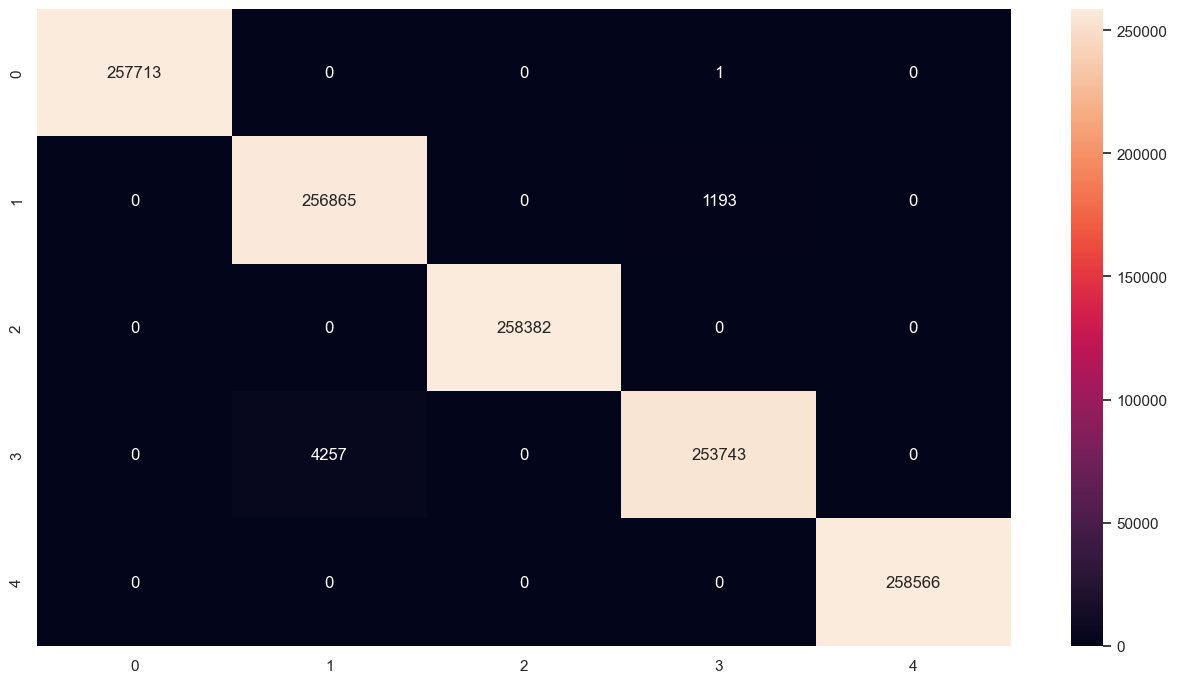

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.98      1.00      0.99    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       1.00      0.98      0.99    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           1.00   1290720
   macro avg       1.00      1.00      1.00   1290720
weighted avg       1.00      1.00      1.00   1290720



In [27]:
from sklearn.metrics import classification_report
outcome_labels = sorted(unique)
print('**************Decision Tree Classifier*****************')
Decision_Tree_Classifier=DecisionTreeClassifier(random_state=42)
Decision_Tree_Classifier.fit(X_train,y_train)
y_predict_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_test)
y_predict_train_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_train)
print('Train Decision Tree Classifier confusion matrix train')
metrics_error(y_train,y_predict_train_Decision_Tree_Classifier)
cm = metrics.confusion_matrix(y_train, y_predict_train_Decision_Tree_Classifier)
confixion_metrix(y_train,y_predict_train_Decision_Tree_Classifier, outcome_labels)
print('Classification report Training')
print(classification_report(y_train,y_predict_train_Decision_Tree_Classifier, target_names=target))

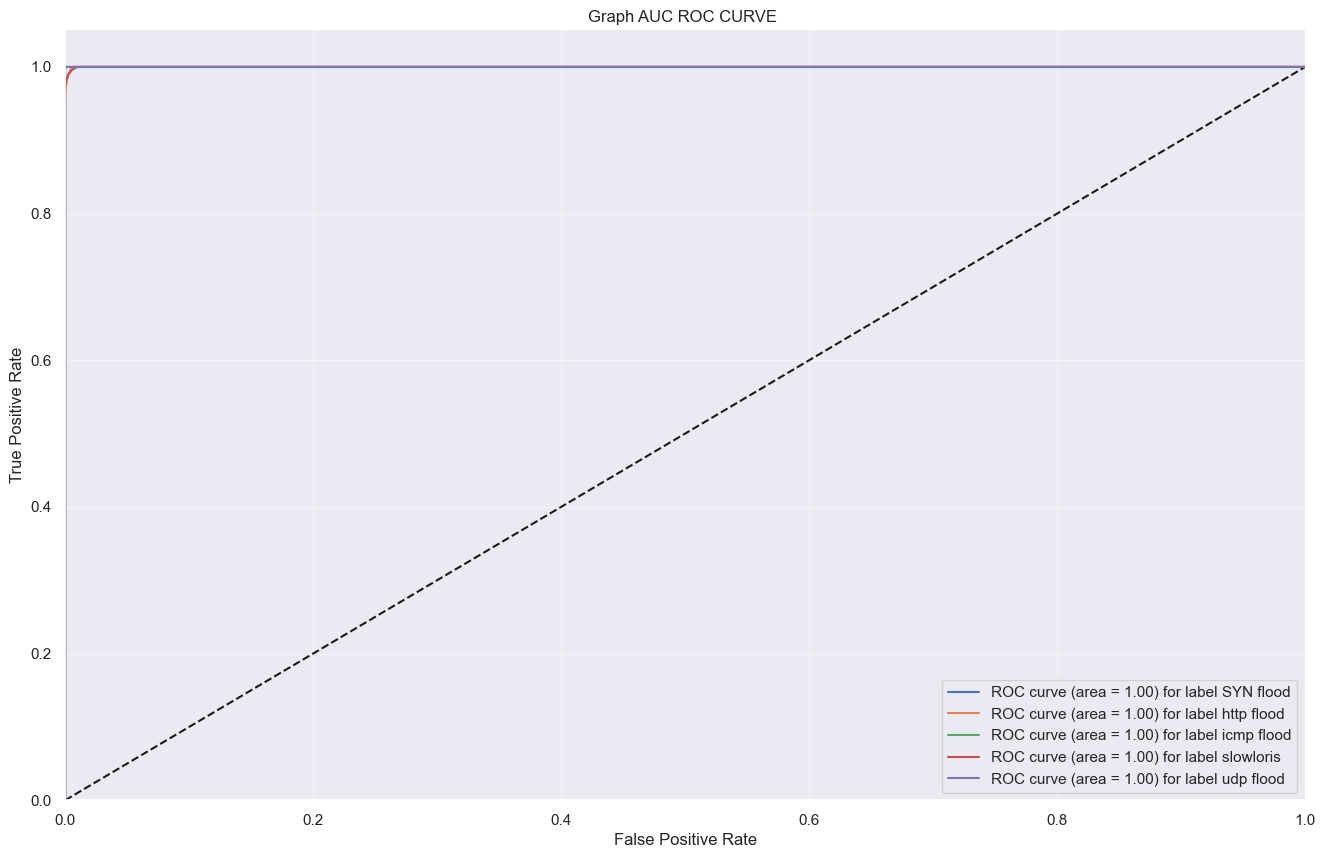

In [28]:
plot_multiclass_roc(Decision_Tree_Classifier, X_train, y_train, n_classes=5, figsize=(16, 10))

**************Test Decision Tree Classifier*****************
accuracy : 0.983423205652659
mean absolute error : 0.03315978678567001
mean squared error : 0.0663753563902318
root mean squared error : 0.2576341522202206


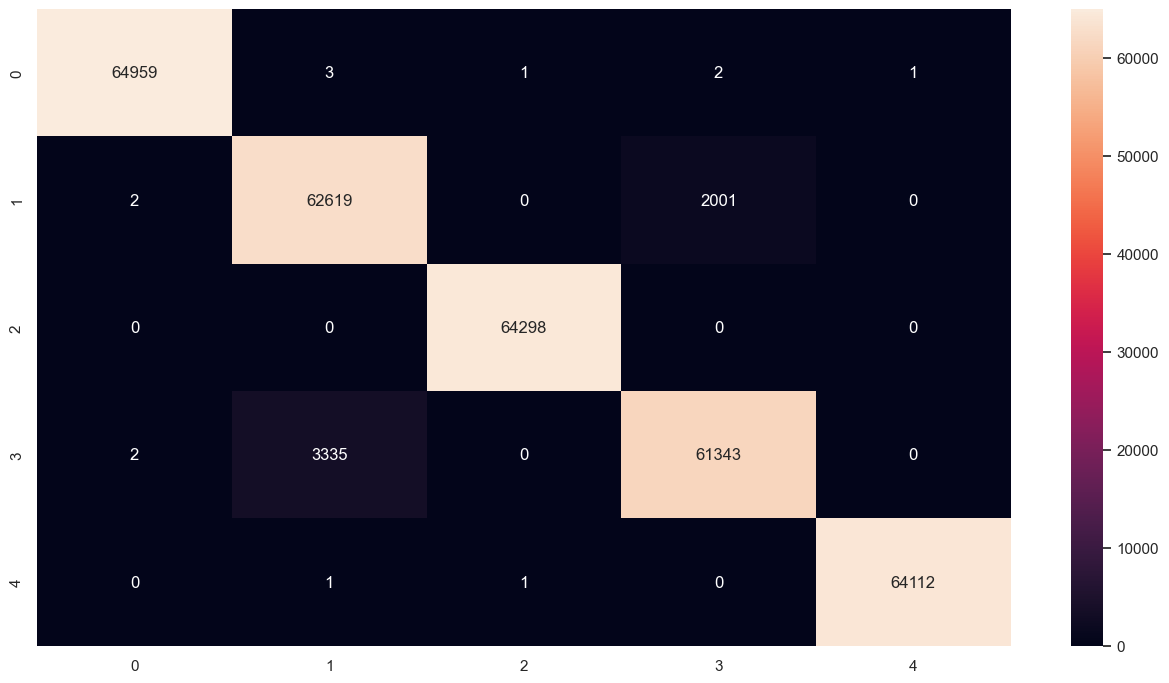

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.95      0.97      0.96     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.97      0.95      0.96     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.98    322680
   macro avg       0.98      0.98      0.98    322680
weighted avg       0.98      0.98      0.98    322680



In [29]:
print('**************Test Decision Tree Classifier*****************')
metrics_error(y_test,y_predict_Decision_Tree_Classifier)
confixion_metrix(y_test, y_predict_Decision_Tree_Classifier, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_Decision_Tree_Classifier, target_names=target))

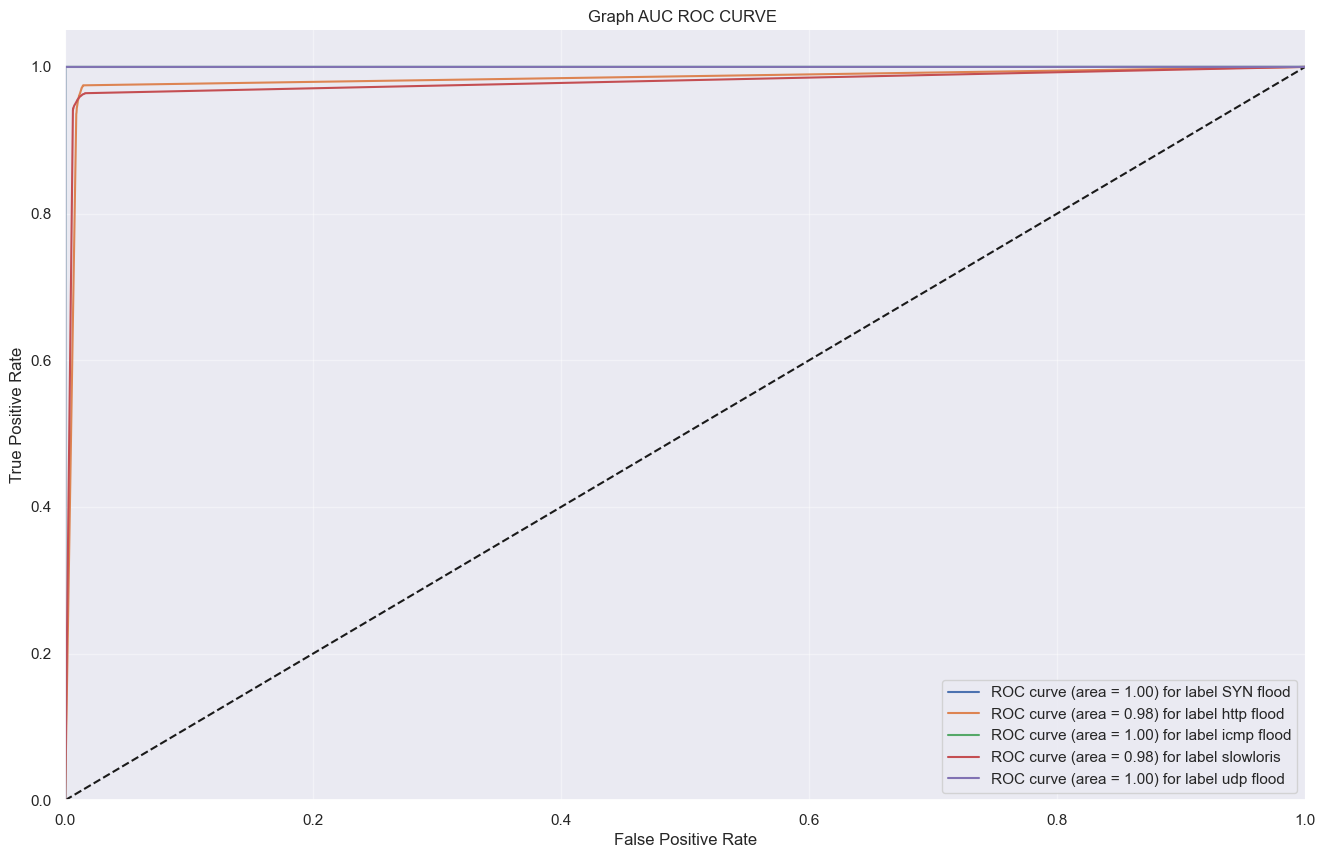

In [30]:
plot_multiclass_roc(Decision_Tree_Classifier, X_test, y_test, n_classes=5, figsize=(16, 10))

# **Logistic Regression**

**************LogisticRegression*****************
**************Train Logistic Regression*****************
accuracy : 0.3860651419362836
mean absolute error : 1.6615214763852733
mean squared error : 5.2841321123094085
root mean squared error : 2.2987240183000237


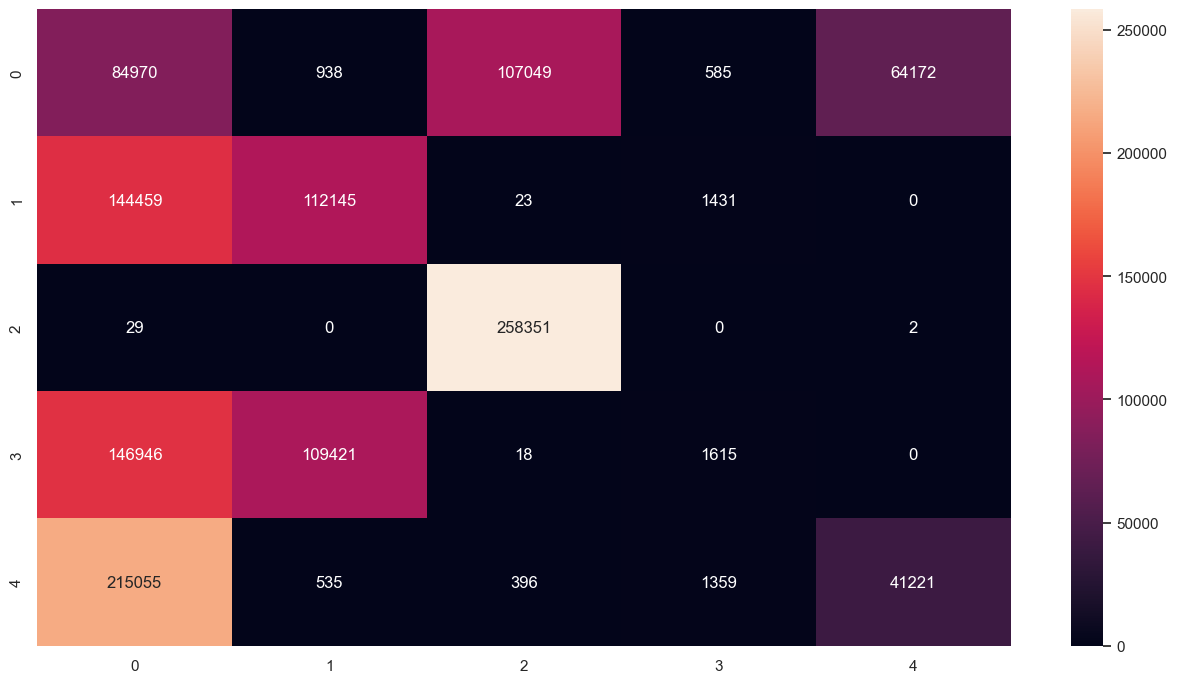

Classification report Training
              precision    recall  f1-score   support

   SYN flood       0.14      0.33      0.20    257714
  http flood       0.50      0.43      0.47    258058
  icmp flood       0.71      1.00      0.83    258382
   slowloris       0.32      0.01      0.01    258000
   udp flood       0.39      0.16      0.23    258566

    accuracy                           0.39   1290720
   macro avg       0.41      0.39      0.35   1290720
weighted avg       0.41      0.39      0.35   1290720



In [31]:
print('**************LogisticRegression*****************')
lgg = LogisticRegression(max_iter=500,random_state=42)
lgg.fit(X_train,y_train)
y_predict=lgg.predict(X_test)
y_predict_train=lgg.predict(X_train)
print('**************Train Logistic Regression*****************')
metrics_error(y_train,y_predict_train)
cm = metrics.confusion_matrix(y_train, y_predict_train)
confixion_metrix(y_train, y_predict_train, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train, target_names=target))

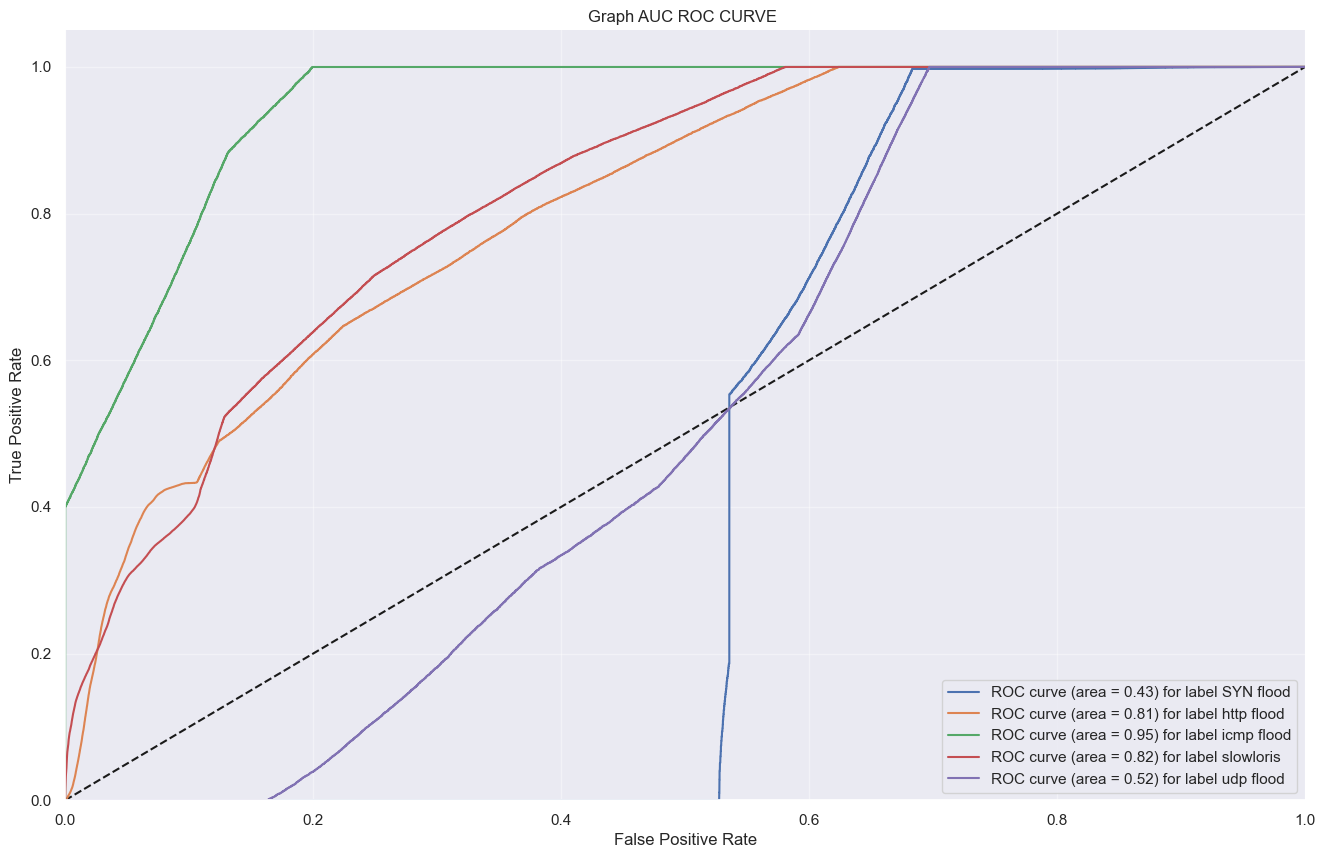

In [32]:
plot_multiclass_roc(lgg, X_train, y_train, n_classes=5, figsize=(16, 10))

**************Test Logistic Regression*****************
accuracy : 0.38537250526837735
mean absolute error : 1.6598890541713152
mean squared error : 5.26945890665675
root mean squared error : 2.295530201643348


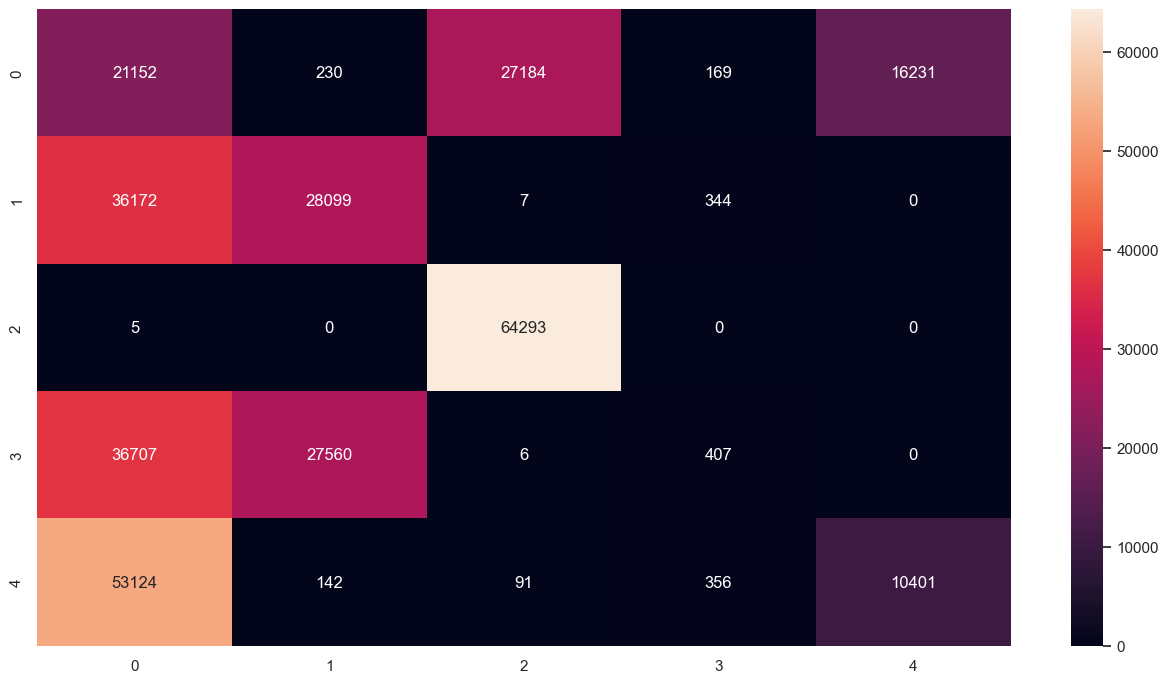

Classification report Test
              precision    recall  f1-score   support

   SYN flood       0.14      0.33      0.20     64966
  http flood       0.50      0.43      0.47     64622
  icmp flood       0.70      1.00      0.82     64298
   slowloris       0.32      0.01      0.01     64680
   udp flood       0.39      0.16      0.23     64114

    accuracy                           0.39    322680
   macro avg       0.41      0.39      0.35    322680
weighted avg       0.41      0.39      0.35    322680



In [33]:
print('**************Test Logistic Regression*****************')
metrics_error(y_test,y_predict)
cm = metrics.confusion_matrix(y_test, y_predict)
confixion_metrix(y_test, y_predict, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict, target_names=target))

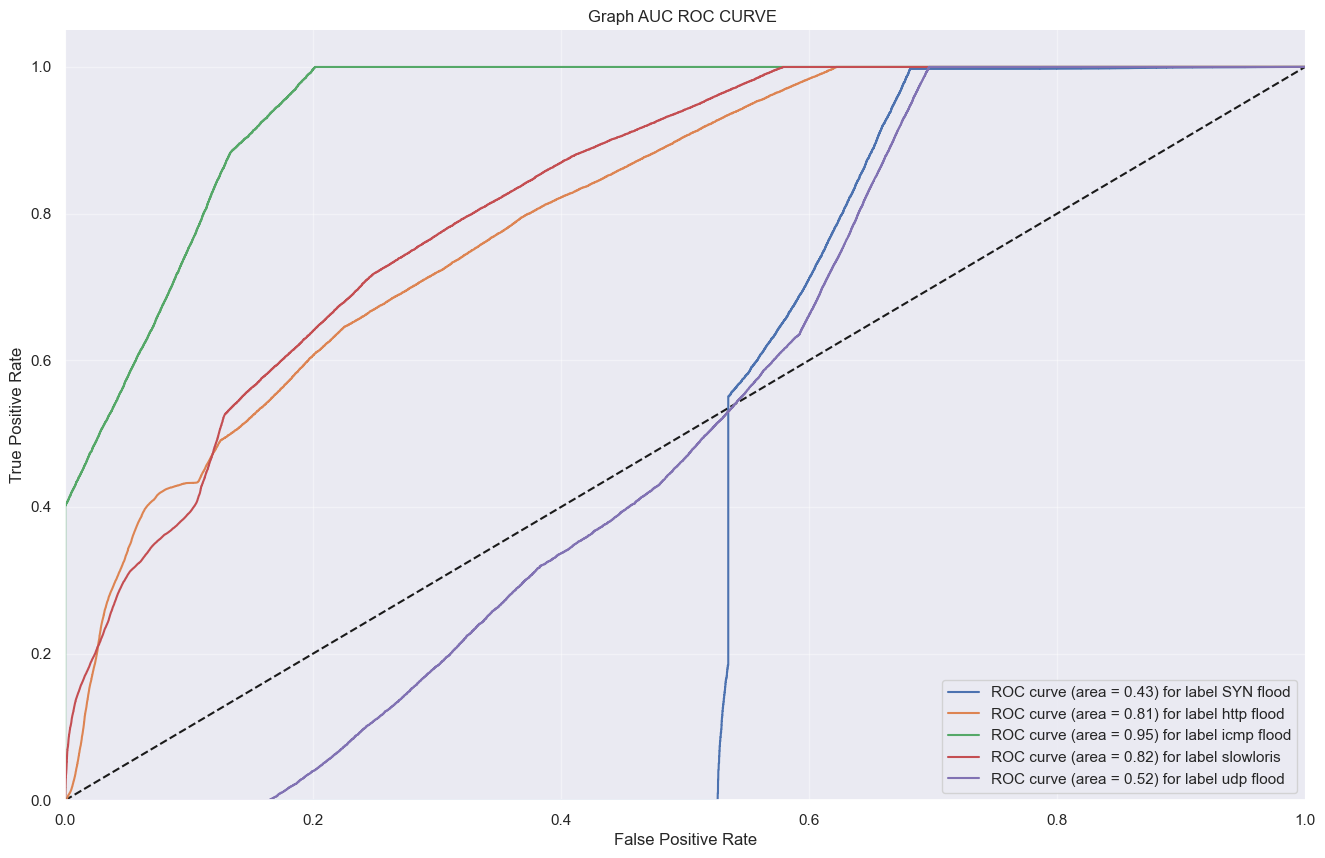

In [34]:
plot_multiclass_roc(lgg, X_test, y_test, n_classes=5, figsize=(16, 10))

# **Random Forest**


**************Random Forest *****************
**************Train Random Forest *****************
accuracy : 0.9925421470187182
mean absolute error : 0.014917255485310525
mean squared error : 0.029839159538862032
root mean squared error : 0.17274015033819448


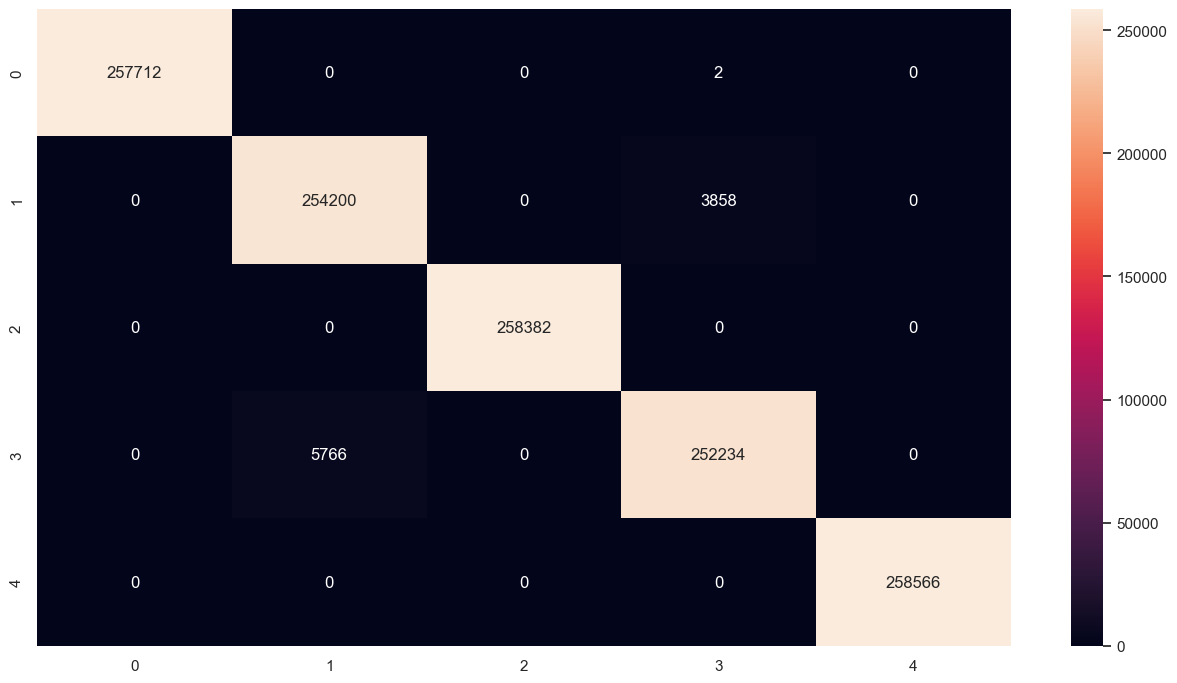

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.98      0.99      0.98    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       0.98      0.98      0.98    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           0.99   1290720
   macro avg       0.99      0.99      0.99   1290720
weighted avg       0.99      0.99      0.99   1290720



In [35]:
print('**************Random Forest *****************')
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)
y_predict_model_RF=model_RF.predict(X_test)
y_predict_train_model_RF=model_RF.predict(X_train)
print('**************Train Random Forest *****************')
metrics_error(y_train,y_predict_train_model_RF)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_RF)
confixion_metrix(y_train, y_predict_train_model_RF, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_RF, target_names=target))

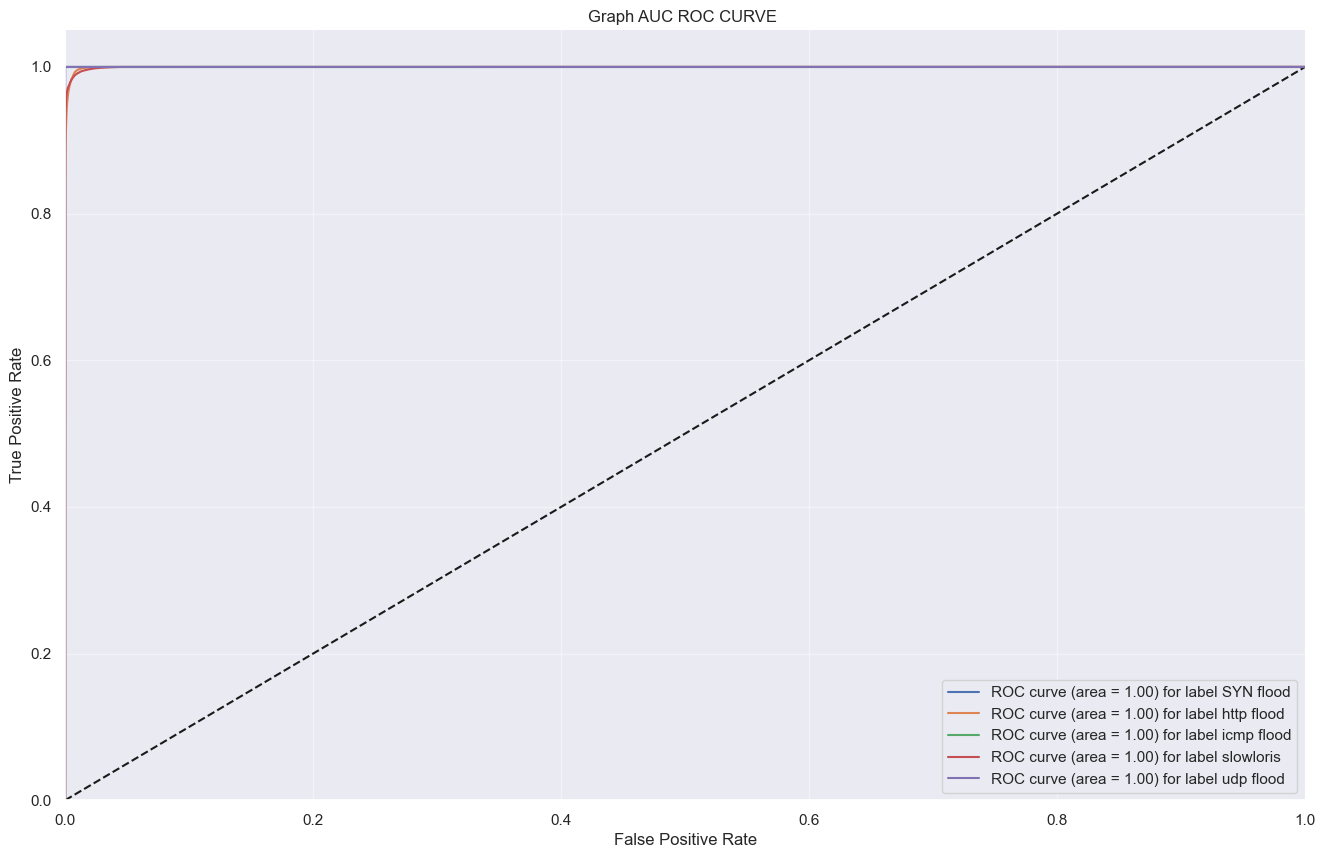

In [36]:
plot_multiclass_roc(model_RF, X_train, y_train, n_classes=5, figsize=(16, 10))

**************Test Random Forest *****************
accuracy : 0.9824625015495227
mean absolute error : 0.035090492128424446
mean squared error : 0.0702522623032106
root mean squared error : 0.2650514333166501


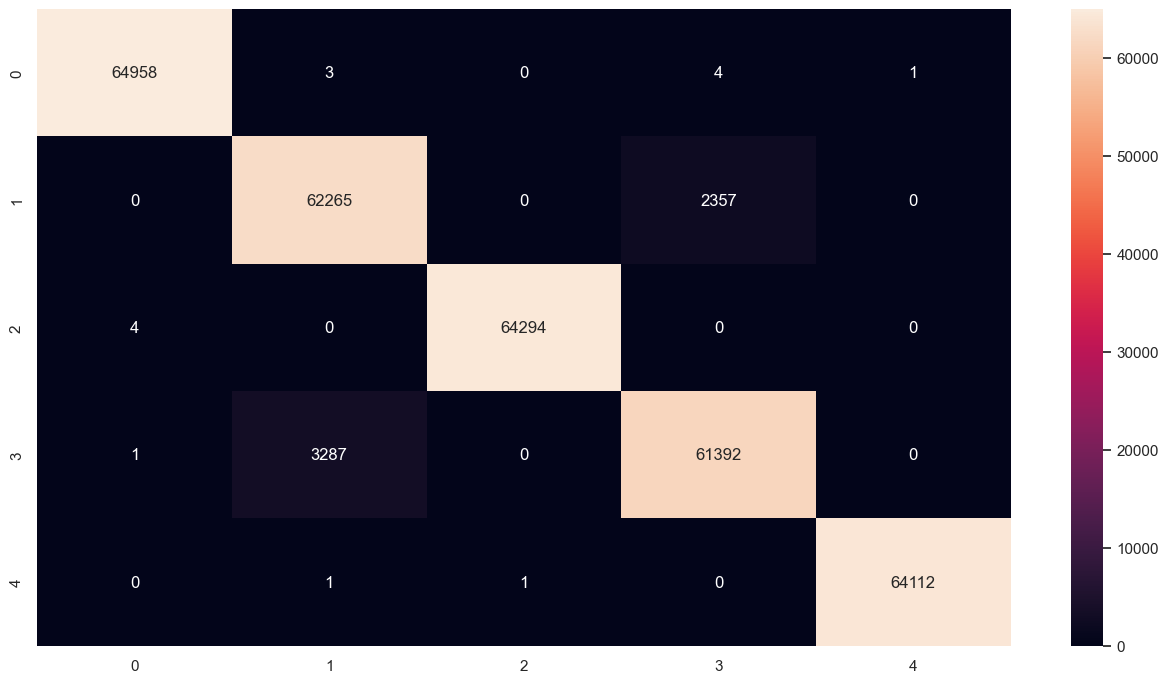

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.95      0.96      0.96     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.96      0.95      0.96     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.98    322680
   macro avg       0.98      0.98      0.98    322680
weighted avg       0.98      0.98      0.98    322680



In [37]:
print('**************Test Random Forest *****************')
metrics_error(y_test,y_predict_model_RF)
cm = metrics.confusion_matrix(y_test, y_predict_model_RF)
confixion_metrix(y_test, y_predict_model_RF, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_RF, target_names=target))

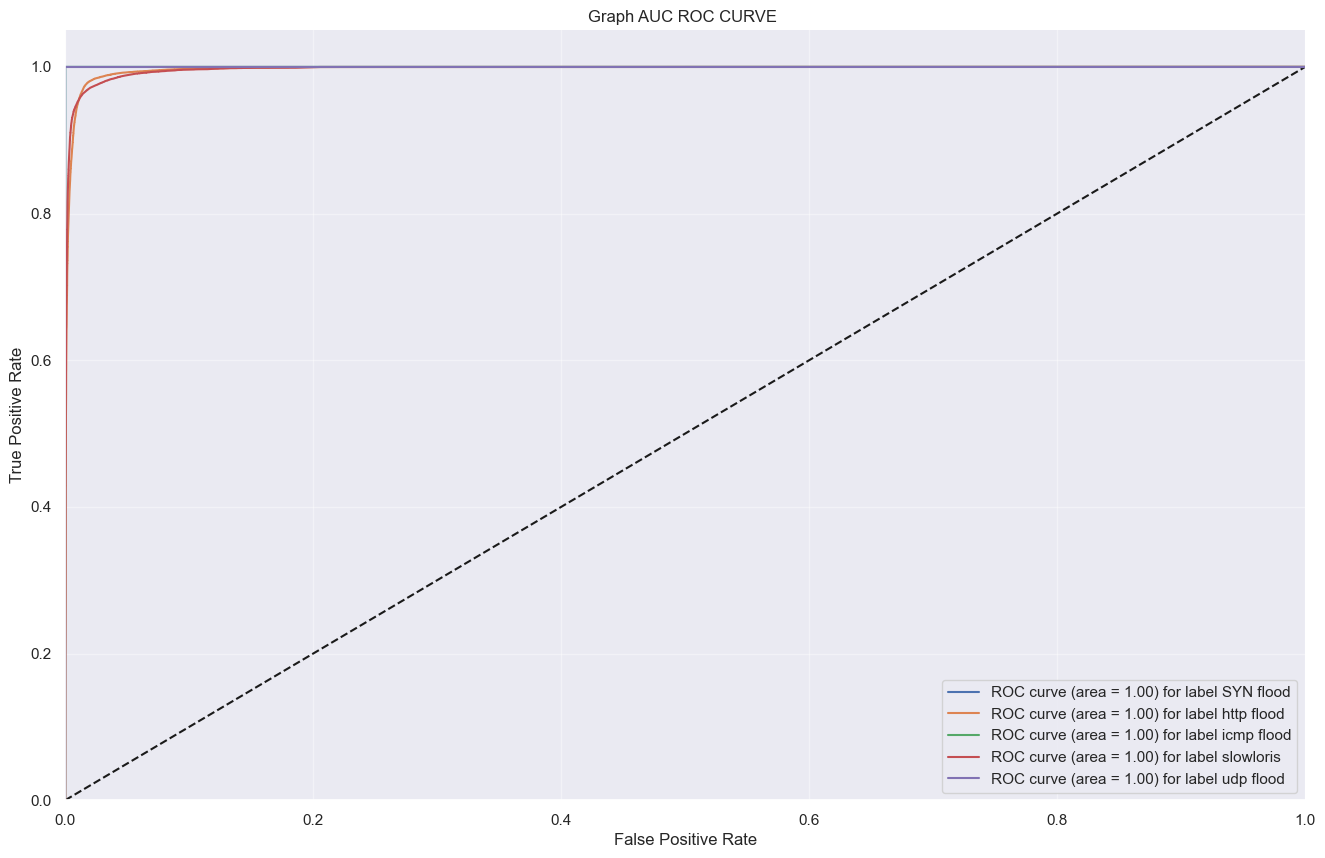

In [38]:
plot_multiclass_roc(model_RF, X_test, y_test, n_classes=5, figsize=(16, 10))

# **Naive Baye**


**************naive bayes*****************
**************Train naive bayes*****************
accuracy : 0.3023250588818644
mean absolute error : 1.5122915891905293
mean squared error : 3.937585998512458
root mean squared error : 1.9843351527684172


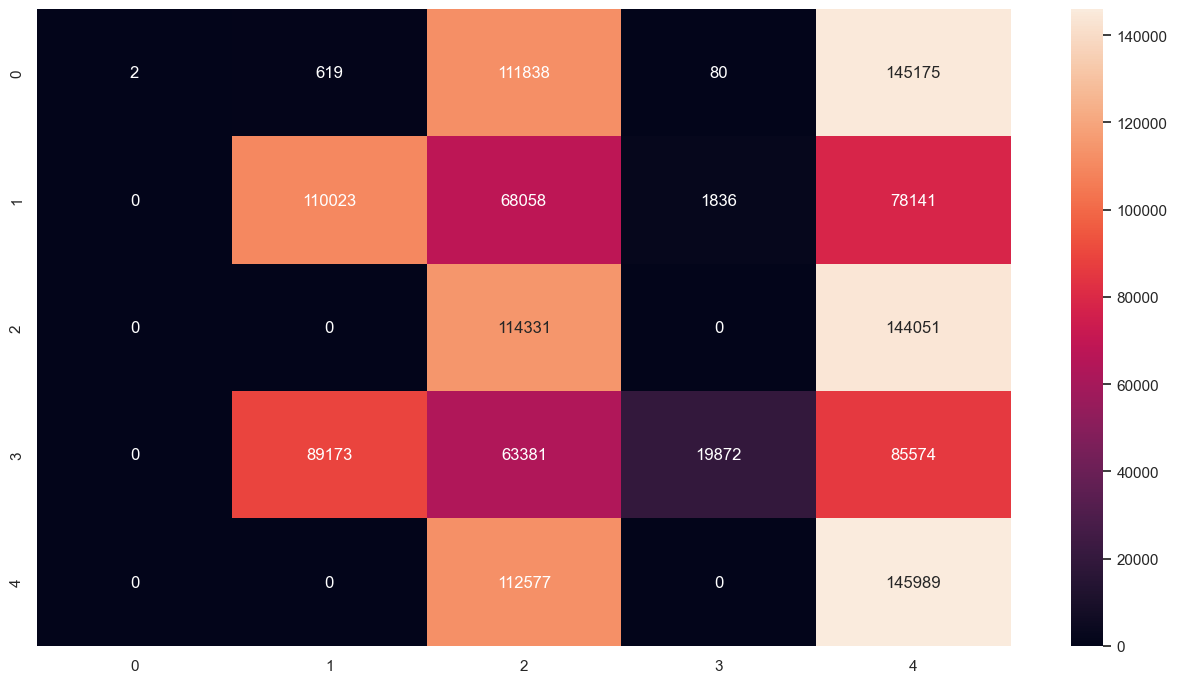

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      0.00      0.00    257714
  http flood       0.55      0.43      0.48    258058
  icmp flood       0.24      0.44      0.31    258382
   slowloris       0.91      0.08      0.14    258000
   udp flood       0.24      0.56      0.34    258566

    accuracy                           0.30   1290720
   macro avg       0.59      0.30      0.26   1290720
weighted avg       0.59      0.30      0.26   1290720



In [39]:
print('**************naive bayes*****************')
#Create a Gaussian Classifier
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
y_predict_model_nb=model_nb.predict(X_test)
y_predict_train_model_nb=model_nb.predict(X_train)
print('**************Train naive bayes*****************')
metrics_error(y_train,y_predict_train_model_nb)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_nb)
confixion_metrix(y_train, y_predict_train_model_nb, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_nb, target_names=target))

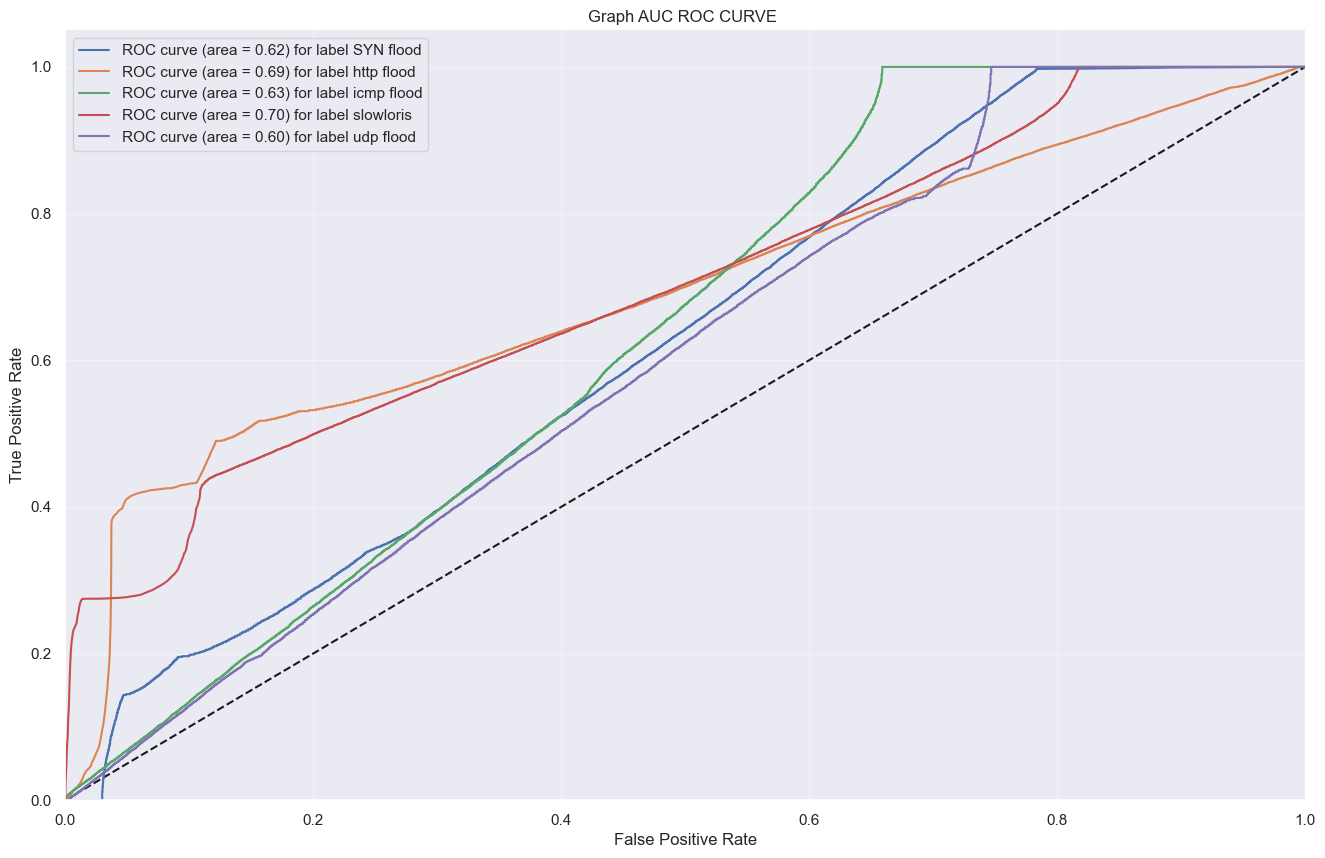

In [40]:
plot_multiclass_roc(model_nb, X_train, y_train, n_classes=5, figsize=(16, 10))

**************Test naive bayes*****************
accuracy : 0.3015061361100781
mean absolute error : 1.5148444279162019
mean squared error : 3.946212966406347
root mean squared error : 1.9865077312727346


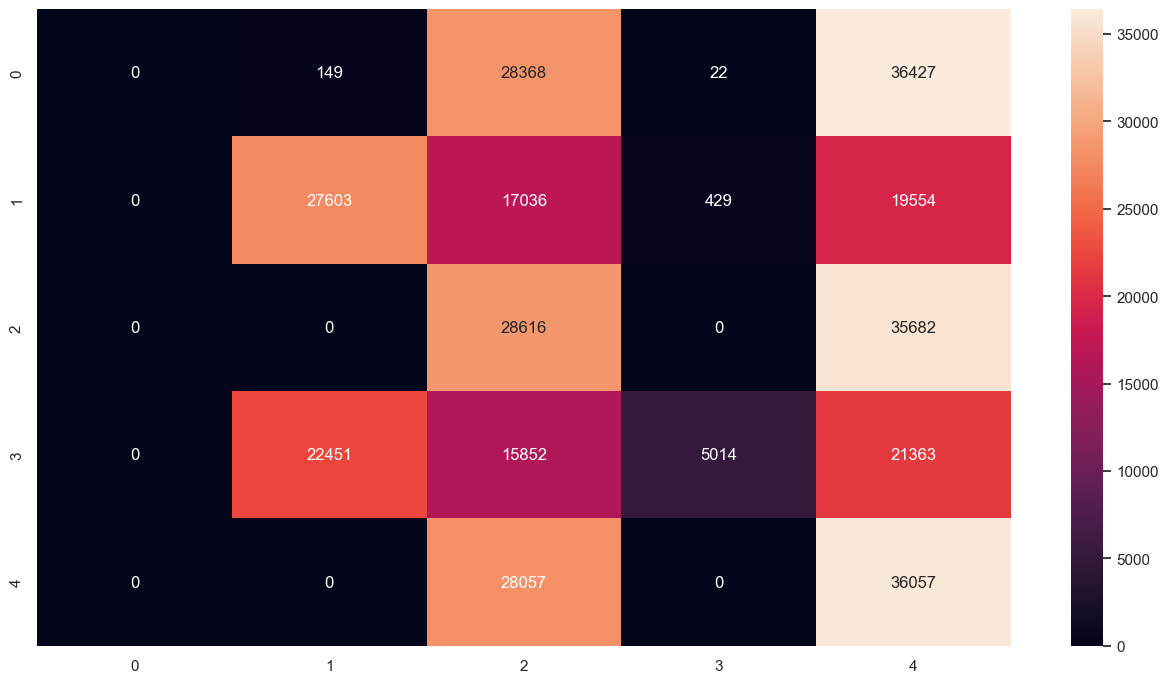

Classification report Test


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   SYN flood       0.00      0.00      0.00     64966
  http flood       0.55      0.43      0.48     64622
  icmp flood       0.24      0.45      0.31     64298
   slowloris       0.92      0.08      0.14     64680
   udp flood       0.24      0.56      0.34     64114

    accuracy                           0.30    322680
   macro avg       0.39      0.30      0.26    322680
weighted avg       0.39      0.30      0.25    322680



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
print('**************Test naive bayes*****************')
metrics_error(y_test,y_predict_model_nb)
cm = metrics.confusion_matrix(y_test, y_predict_model_nb)
confixion_metrix(y_test, y_predict_model_nb, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_nb, target_names=target))

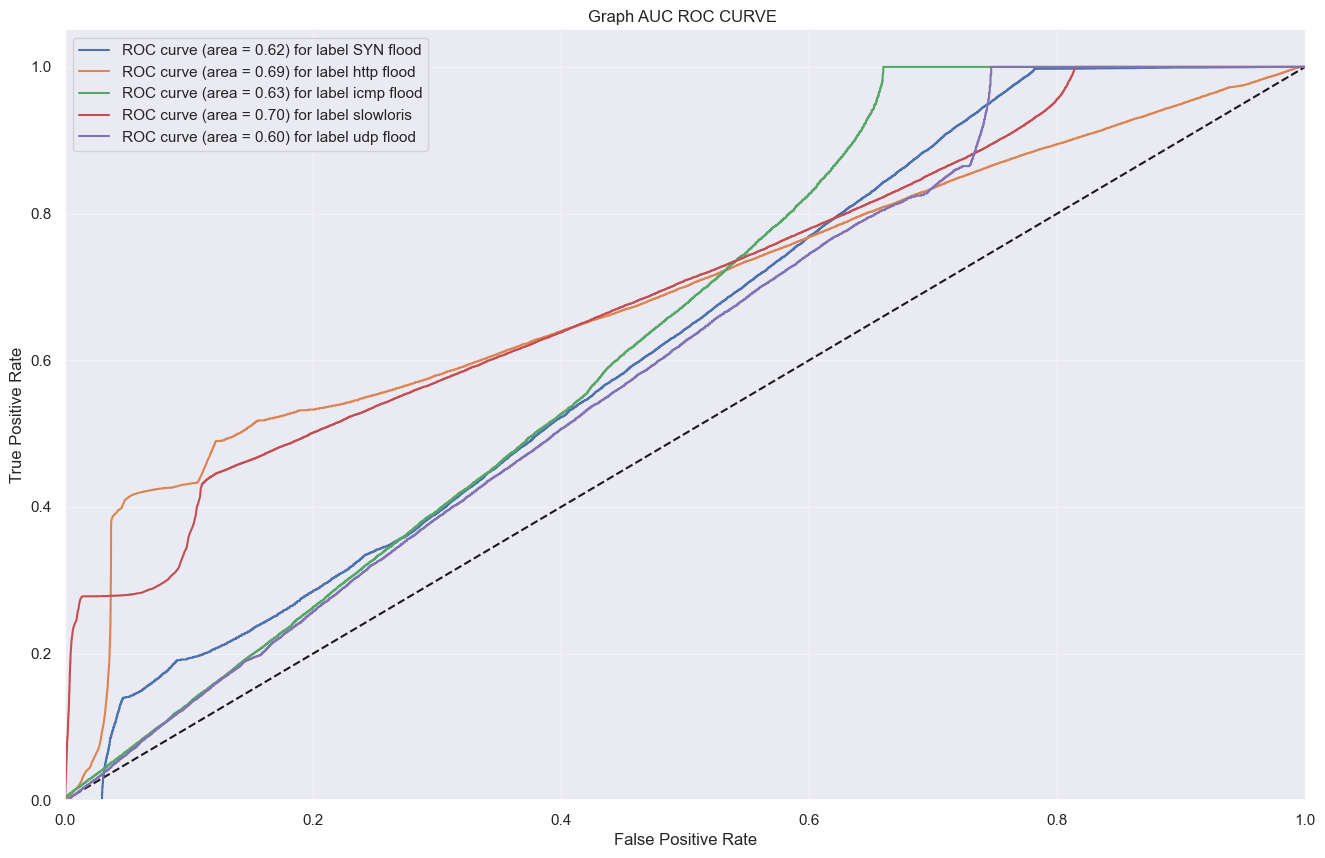

In [42]:
plot_multiclass_roc(model_nb, X_test, y_test, n_classes=5, figsize=(16, 10))

# MLP perceptron


************* MLP perceptron************
*************test MLP perceptron************
accuracy 0.1997985620428908
RMSE dl 1.413959342217942


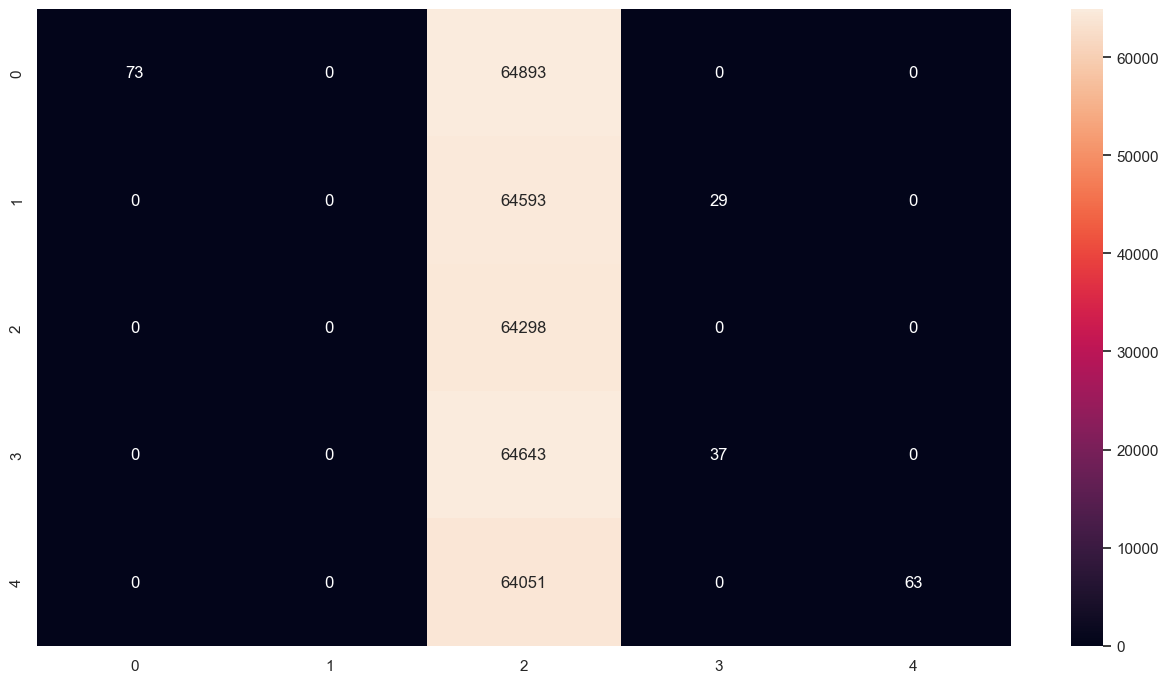

Classification report Test


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   SYN flood       1.00      0.00      0.00     64966
  http flood       0.00      0.00      0.00     64622
  icmp flood       0.20      1.00      0.33     64298
   slowloris       0.56      0.00      0.00     64680
   udp flood       1.00      0.00      0.00     64114

    accuracy                           0.20    322680
   macro avg       0.55      0.20      0.07    322680
weighted avg       0.55      0.20      0.07    322680



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
print("************* MLP perceptron************")
mlp=MLPClassifier(max_iter=200,learning_rate_init=0.001,random_state=42,warm_start=True)
mlp.fit(X_train,y_train)
y_predict_mlp=mlp.predict(X_test)
y_predict_mlp_train=mlp.predict(X_train)
print("*************test MLP perceptron************")
print('accuracy',metrics.accuracy_score(y_test,y_predict_mlp))
print('RMSE dl',np.sqrt(metrics.mean_squared_error(y_test,y_predict_mlp)))
confixion_metrix(y_test,y_predict_mlp, outcome_labels)
print('Classification report Test')
print(classification_report(y_test,y_predict_mlp, target_names=target))

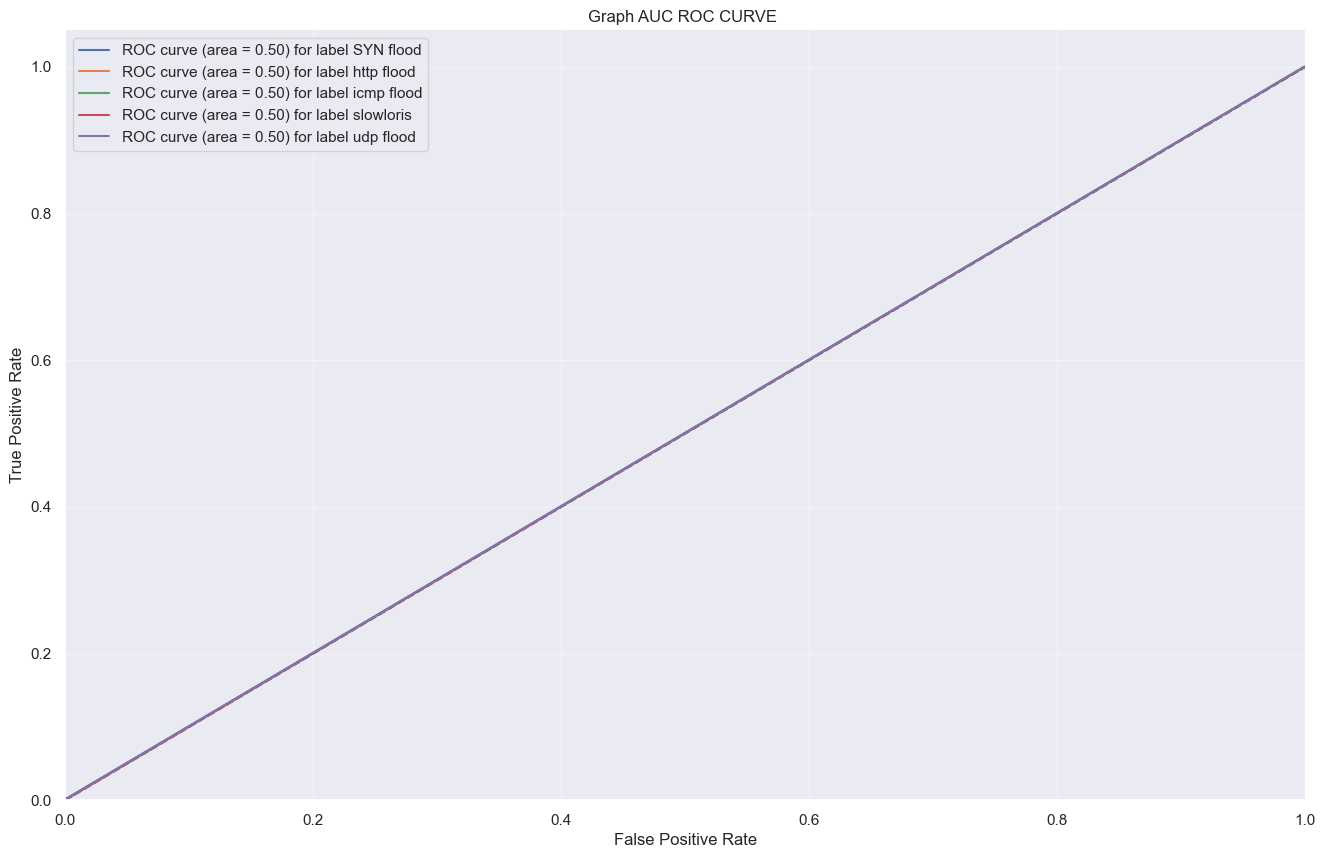

In [44]:
plot_multiclass_roc(mlp, X_test, y_test, n_classes=5, figsize=(16, 10))

*************train MLP perceptron************
accuracy 0.20074377091855708
RMSE dl 1.4135905321685867


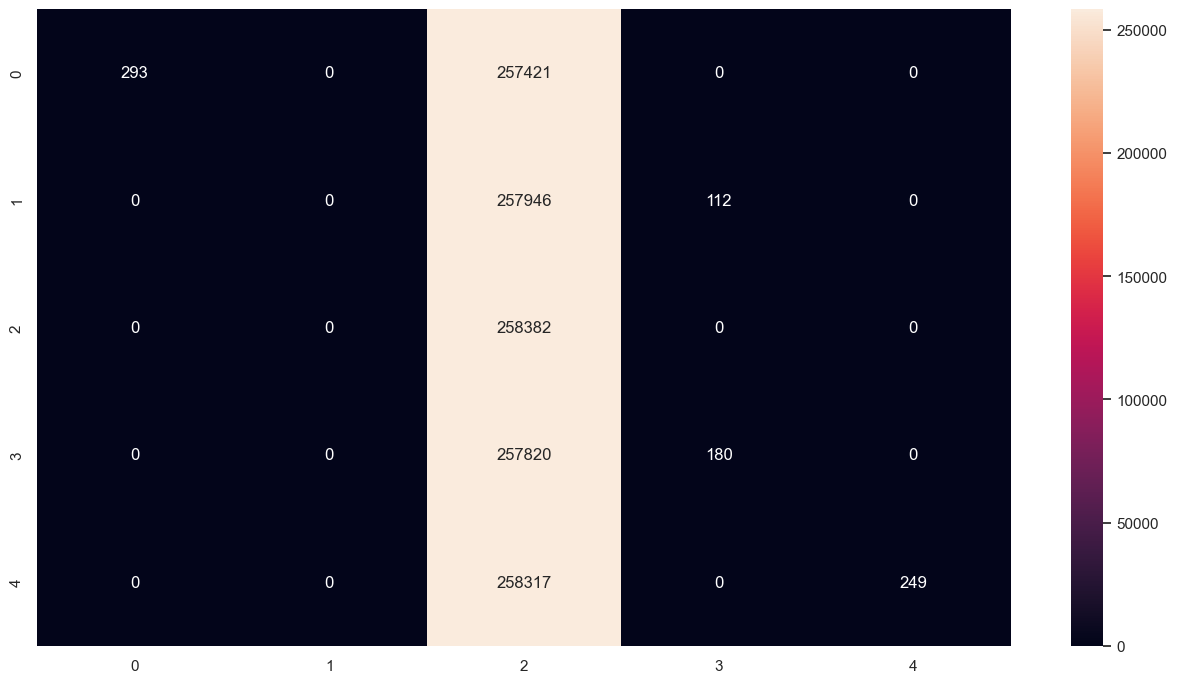

Classification report Training


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   SYN flood       1.00      0.00      0.00    257714
  http flood       0.00      0.00      0.00    258058
  icmp flood       0.20      1.00      0.33    258382
   slowloris       0.62      0.00      0.00    258000
   udp flood       1.00      0.00      0.00    258566

    accuracy                           0.20   1290720
   macro avg       0.56      0.20      0.07   1290720
weighted avg       0.56      0.20      0.07   1290720



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
print("*************train MLP perceptron************")
print('accuracy',metrics.accuracy_score(y_train,y_predict_mlp_train))
print('RMSE dl',np.sqrt(metrics.mean_squared_error(y_train,y_predict_mlp_train)))
cm_mlp_train = metrics.confusion_matrix(y_train,y_predict_mlp_train)
confixion_metrix(y_train,y_predict_mlp_train, outcome_labels)
print('Classification report Training')
print(classification_report(y_train,y_predict_mlp_train, target_names=target))

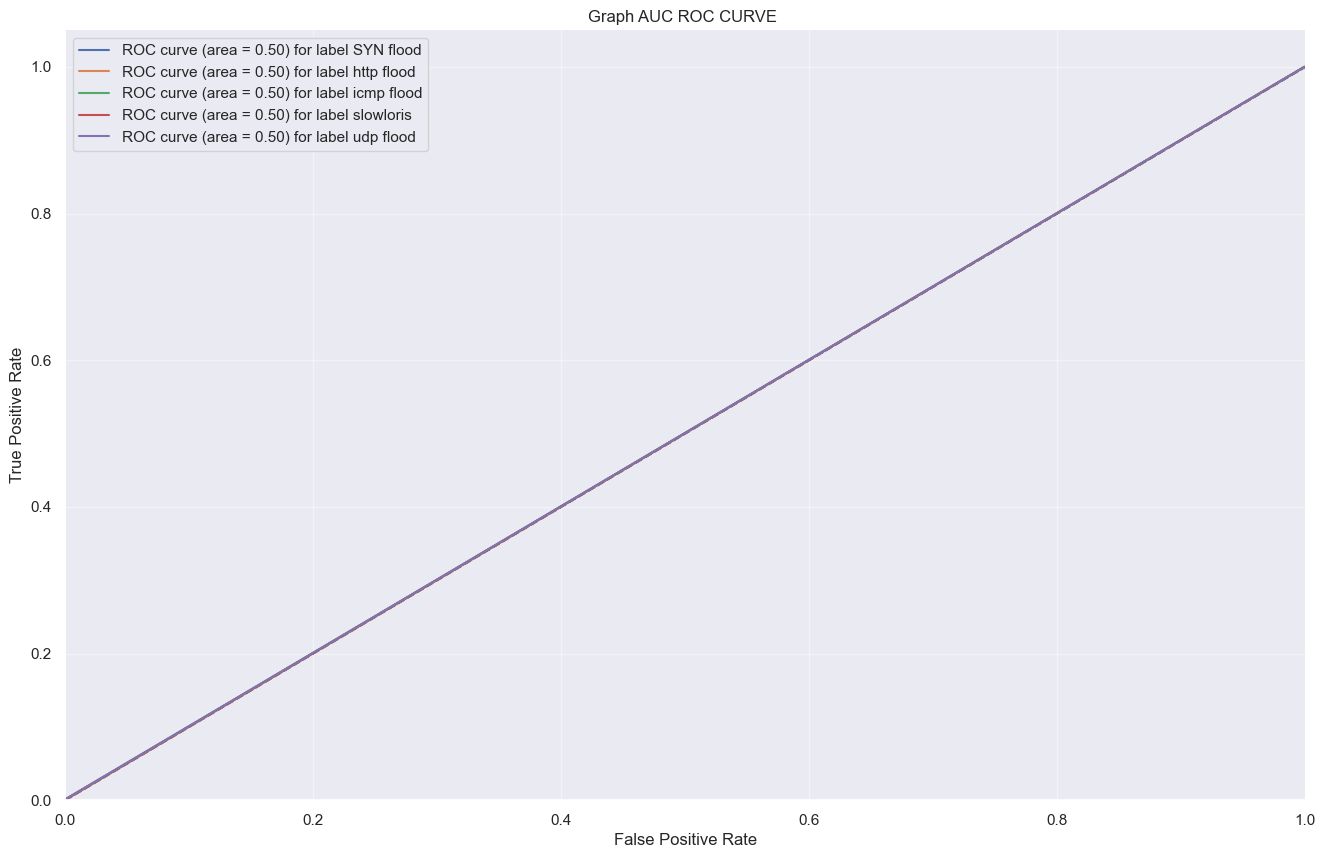

In [46]:
plot_multiclass_roc(mlp, X_train, y_train, n_classes=5, figsize=(16, 10))

# XGBoost

In [47]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
accuracy_train = metrics.accuracy_score(y_train, y_pred_t)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))

Accuracy test: 95.57%
Accuracy train: 95.63%


# **Models comparison**


In [49]:
AS1=metrics.accuracy_score(y_test,y_predict)
RMSE1=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
ASt1=metrics.accuracy_score(y_train,y_predict_train)
RMSEt1=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))
AS2=metrics.accuracy_score(y_test,y_predict_Decision_Tree_Classifier)
RMSE2=np.sqrt(metrics.mean_squared_error(y_test,y_predict_Decision_Tree_Classifier))
ASt2=metrics.accuracy_score(y_test,y_predict_Decision_Tree_Classifier)
RMSEt2=np.sqrt(metrics.mean_squared_error(y_test,y_predict_Decision_Tree_Classifier))
AS3=metrics.accuracy_score(y_test,y_predict_model_nb)
RMSE3=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_nb))

ASt3=metrics.accuracy_score(y_train,y_predict_train_model_nb)
RMSEt3=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_nb))
AS4=metrics.accuracy_score(y_test,y_predict_model_RF)
RMSE4=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_RF))

ASt4=metrics.accuracy_score(y_train,y_predict_train_model_RF)
RMSEt4=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_RF))


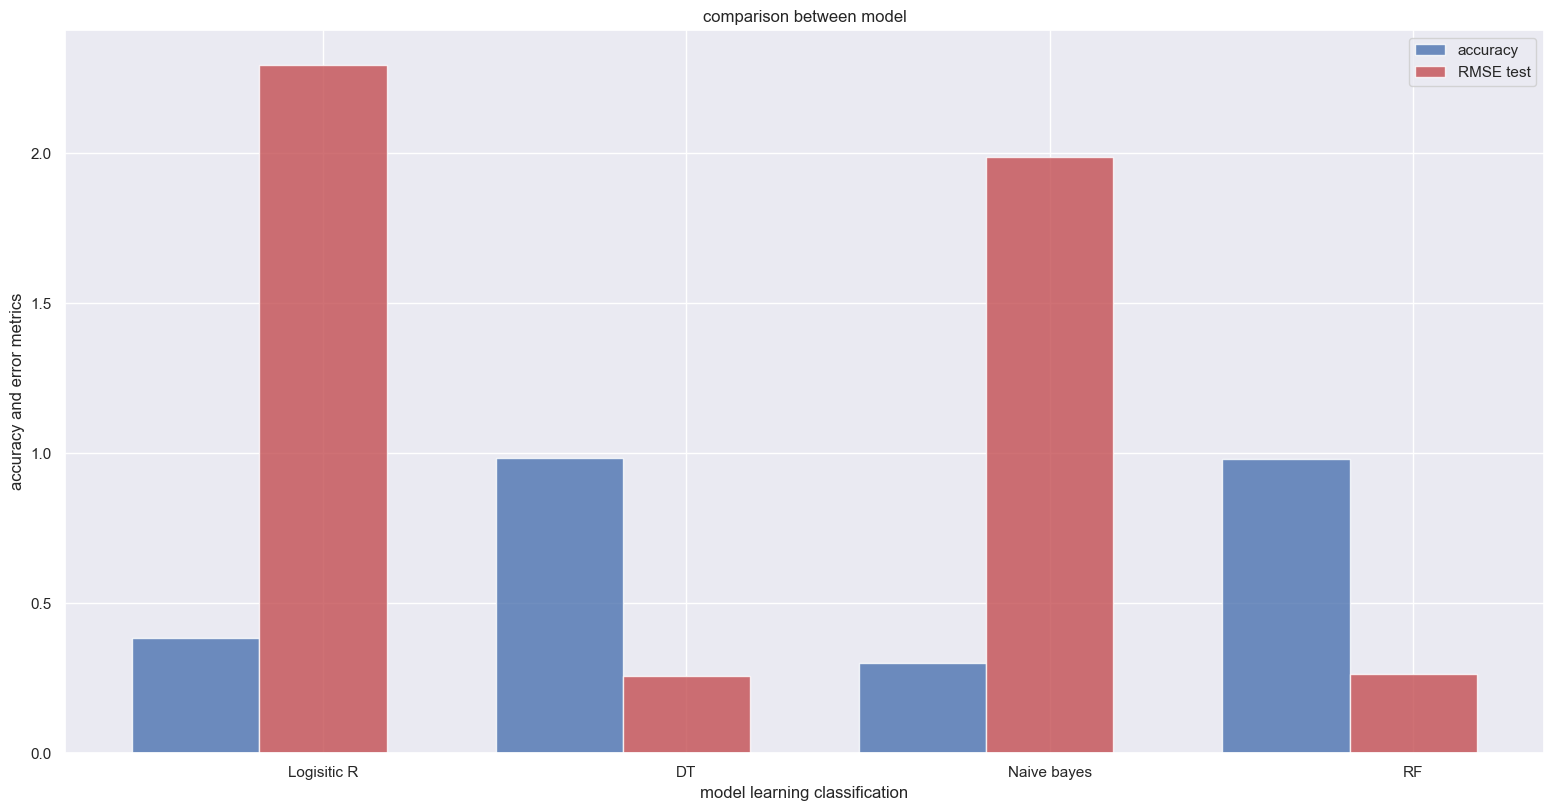

In [58]:
#visualisation perfermance
# data to plot
n_groups = 4
accuracy_score_models_test = (AS1,AS2,AS3,AS4)
error_metric_models_test = (RMSE1,RMSE2,RMSE3,RMSE4)
accuracy_score_models_train = (ASt1,ASt2,ASt3,ASt4)
error_metric_models_train = (RMSEt1,RMSEt2,RMSEt3,RMSEt4)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, accuracy_score_models_test, bar_width,
alpha=opacity,
color='b',
label='accuracy')

rects2 = plt.bar(index + bar_width, error_metric_models_test, bar_width,
alpha=opacity,
color='r',
label='RMSE test')

plt.xlabel('model learning classification')
plt.ylabel('accuracy and error metrics')
plt.title('comparison between model')
plt.xticks(index + bar_width, ('Logisitic R', 'DT', 'Naive bayes','RF'))
plt.legend()

plt.tight_layout()
plt.show()

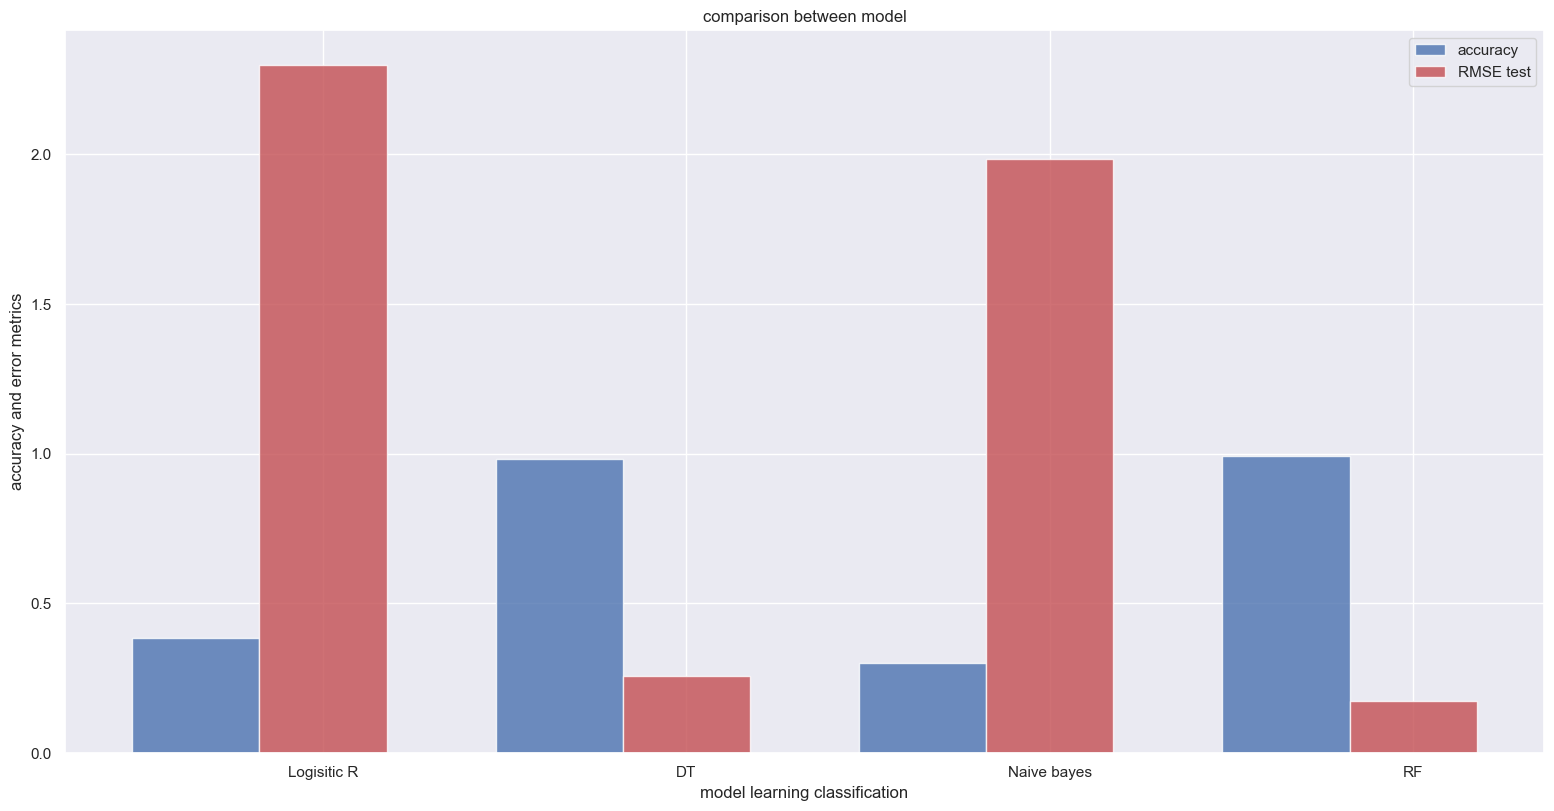

In [59]:
rects1 = plt.bar(index, accuracy_score_models_train, bar_width,
alpha=opacity,
color='b',
label='accuracy')

rects2 = plt.bar(index + bar_width, error_metric_models_train, bar_width,
alpha=opacity,
color='r',
label='RMSE test')

plt.xlabel('model learning classification')
plt.ylabel('accuracy and error metrics')
plt.title('comparison between model')
plt.xticks(index + bar_width, ('Logisitic R', 'DT', 'Naive bayes','RF'))
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
import pickle
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(model_RF, f)

In [61]:
predictions=model_RF.predict(X)

In [62]:
with open('standardscalerclass.pkl','wb') as f:
    pickle.dump(scaler,f)